In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [31]:
(X_train, _), (X_test, _) = mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

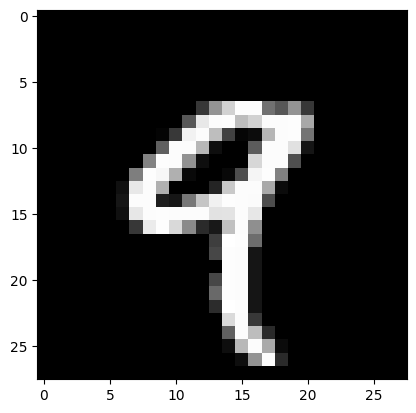

In [34]:
plt.imshow(X_train[4], cmap = 'gray')
plt.show()

In [35]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [36]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [37]:
X_train_noisy = X_train + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
X_test_noisy = X_test + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)

In [38]:
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [39]:
inputs = Input(shape = (784,)) # 784 = 28 * 28

encoder = Dense(32, activation = 'relu')(inputs)
decoder = Dense(784, activation = 'sigmoid')(encoder)

autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (X_test_noisy, X_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2783 - val_loss: 0.2170
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1981 - val_loss: 0.1810
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1722 - val_loss: 0.1612
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1561 - val_loss: 0.1489
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1463 - val_loss: 0.1415
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1404 - val_loss: 0.1368
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1364 - val_loss: 0.1336
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1335 - val_loss: 0.1311
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1313 - val_loss: 0.1293
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1296 - val_lo

In [40]:
idx = np.random.randint(X_test.shape[0])

original_image = X_test[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = original_image.shape)
noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis = 0))
denoised_image = denoised_image.reshape((28, 28))

1/1 [==============================] - 0s 59ms/step


(-0.5, 27.5, 27.5, -0.5)

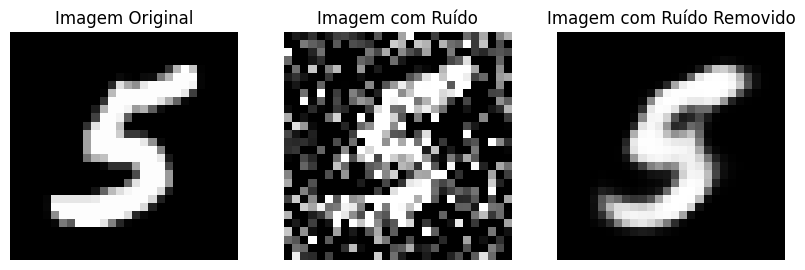

In [41]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap = 'gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image.reshape(28, 28), cmap = 'gray')
plt.title("Imagem com Ruído")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap = 'gray')
plt.title("Imagem com Ruído Removido")
plt.axis("off")